In [137]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [138]:
with MPRester("7QuxsitdhRpT0oyz") as m:

    band_structure = m.get_phonon_bandstructure_by_material_id("mp-23209")
    
BSPlot = PhononBSPlotter(band_structure)

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [139]:
# Branches et directions

freq = BSPlot.bs_plot_data().get('frequency')
dist = BSPlot.bs_plot_data().get('distances')

direction = [] ; branche = [] ; position = [] 
coeff = [] ; x = []   ; tg = [] 
count = 0

for i in range(len(freq)):
    for j in range(len(freq[i])):
        if ( (i not in direction) and (j not in branche) ) :
            if (freq[i][j][0] == 0) :
                direction.append(i) ; branche.append(j) ; position.append((0,1))
                count += 1
                break
            elif (freq[i][j][-1] == 0) :
                direction.append(i) ; branche.append(j) ; position.append((-2,-1))
                count += 1
                break
    if count == 3:
        break
        
for i in range(3):  
    pts = np.array([freq[z[i]][branche[i]][position[i][0]],
                       freq[z[i]][branche[i]][position[i][1]]])
    X = np.array([dist[z[i]][p[i][0]], dist[z[i]][p[i][1]]])
    coeff.append(np.polyfit(X,pts,1))
    x.append(np.linspace(dist[z[i]][0],dist[z[i]][-1],100))
    tg.append(coeff[i][0] * abs[i] + coeff[i][1])

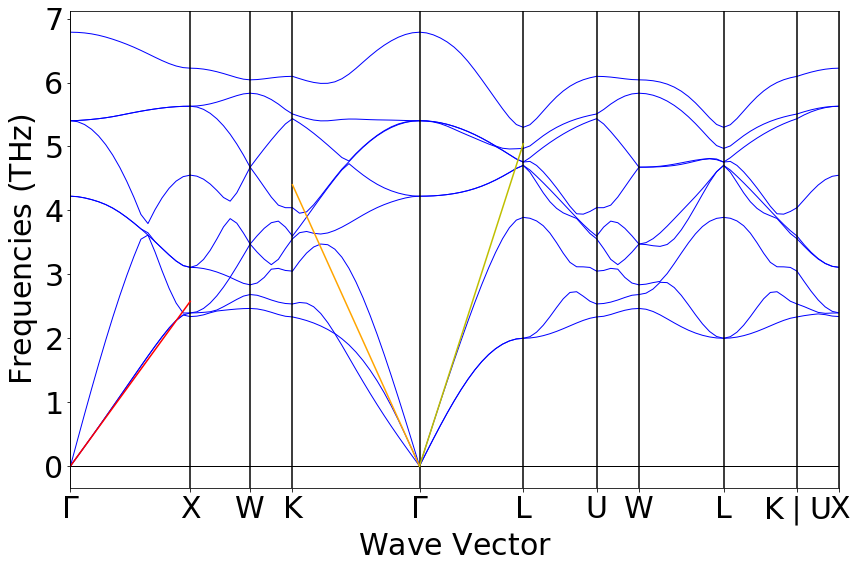

In [140]:
# Plot

BSPlot.get_plot()
plt.plot(x[0], tg[0], color = 'r')
plt.plot(x[1], tg[1], color = 'orange')
plt.plot(x[2], tg[2], color = 'y')
plt.show()

In [141]:
# Vitesses 

v1 = 2*pi*coeff[0][0]*100
v2 = 2*pi*coeff[1][0]*100
v3 = 2*pi*coeff[2][0]*100
print("Vitesse du son pour la première, deuxième et troisième branche acoustique respectivement: ")
print(v1, "m/s, ", v2, "m/s, ", v3, "m/s")

Vitesse du son pour la première, deuxième et troisième branche acoustique respectivement: 
1779.1411169748642 m/s,  -2865.8361290302223 m/s,  4021.3072071937786 m/s
